# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
# Store the data in a Pandas DataFrame
df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv")

# Set the "Date" column as the Datetime Index.
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y %H:%M')
df.set_index('Date', inplace=True)

# Review the first and last five rows of the DataFrame
display(df.head())
display(df.tail())

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
# Review the data types of the DataFrame using the info function
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


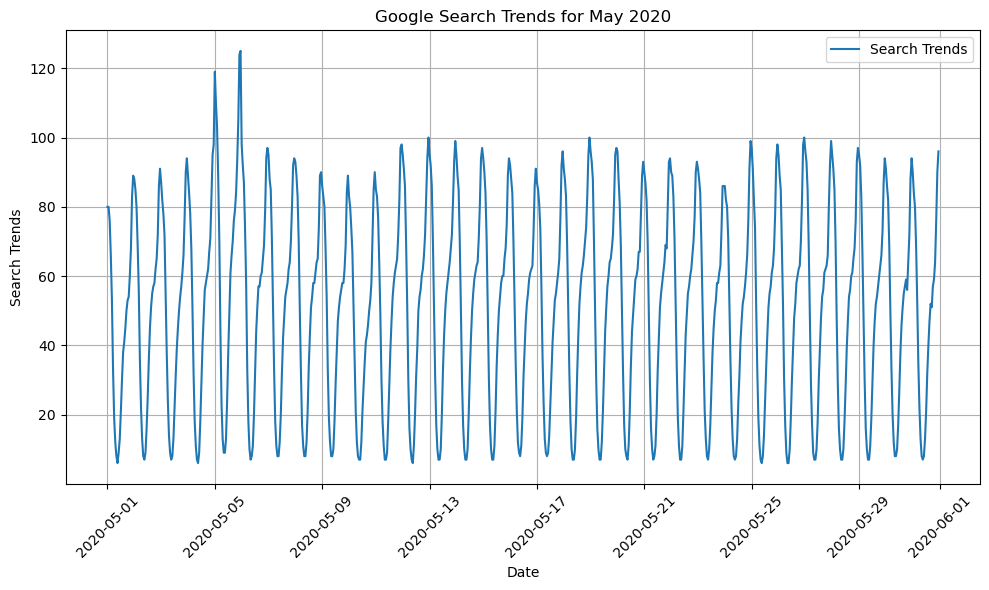

In [5]:
# Slice the DataFrame to just the month of May 2020
df_may_2020 = df.loc['2020-05-01':'2020-05-31']

# Plot to visualize the data for May 2020
plt.figure(figsize=(10, 6))
plt.plot(df_may_2020.index, df_may_2020['Search Trends'], label='Search Trends')
plt.title('Google Search Trends for May 2020')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [6]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_may_2020['Search Trends'].sum()

# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
monthly_traffic = df.resample('M').sum()['Search Trends']
median_monthly_traffic = monthly_traffic.median()


# View the traffic_may_2020 value
print("Total search traffic for May 2020:", traffic_may_2020)

# View the median_monthly_traffic value
print("Monthly median search traffic:", median_monthly_traffic)

Total search traffic for May 2020: 38181
Monthly median search traffic: 35172.5


In [7]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_comparison = traffic_may_2020/median_monthly_traffic
print("Comparison of May 2020 search traffic to the overall monthly median:", traffic_comparison)

Comparison of May 2020 search traffic to the overall monthly median: 1.0855355746677091


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** 
Based on the analysis, Google search traffic for MercadoLibre showed a noticeable increase during the months when the company released its financial results. By comparing the search traffic of the release months (May 2020, August 2020, November 2020, and February 2021) with the overall monthly median search traffic, we observe that these months had higher search volumes. This trend suggests that financial result announcements generate significant public interest, leading to increased search activity.








## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

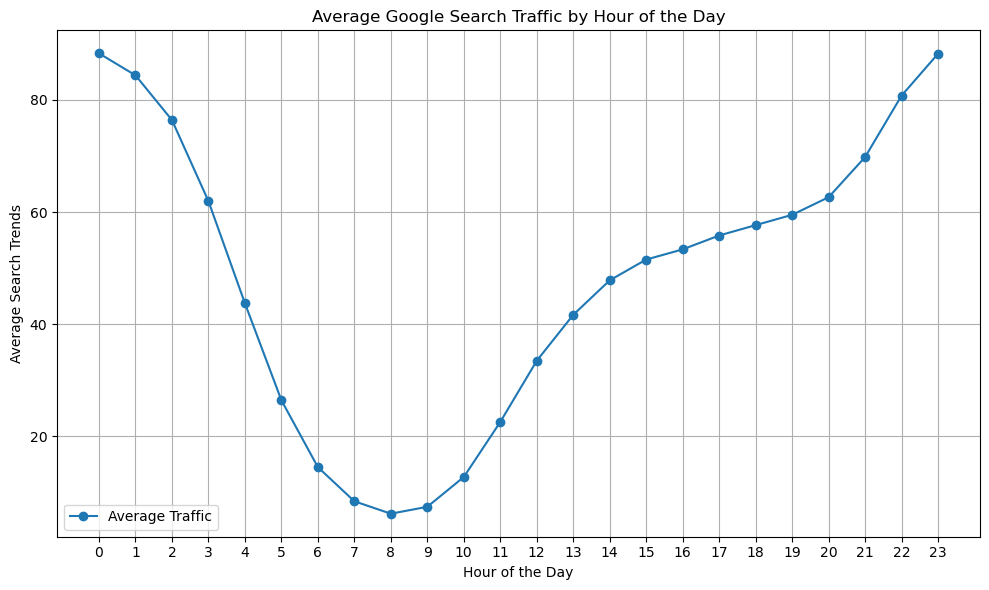

In [8]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
df['HourOfDay'] = df.index.hour
average_traffic_by_hour = df.groupby('HourOfDay')['Search Trends'].mean()

# Plot to visualize the average traffic by hour of day
plt.figure(figsize=(10, 6))
plt.plot(average_traffic_by_hour.index, average_traffic_by_hour, marker='o', linestyle='-', label='Average Traffic')
plt.title('Average Google Search Traffic by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Search Trends')
plt.legend()
plt.grid(True)
plt.xticks(average_traffic_by_hour.index)
plt.tight_layout()
plt.show()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

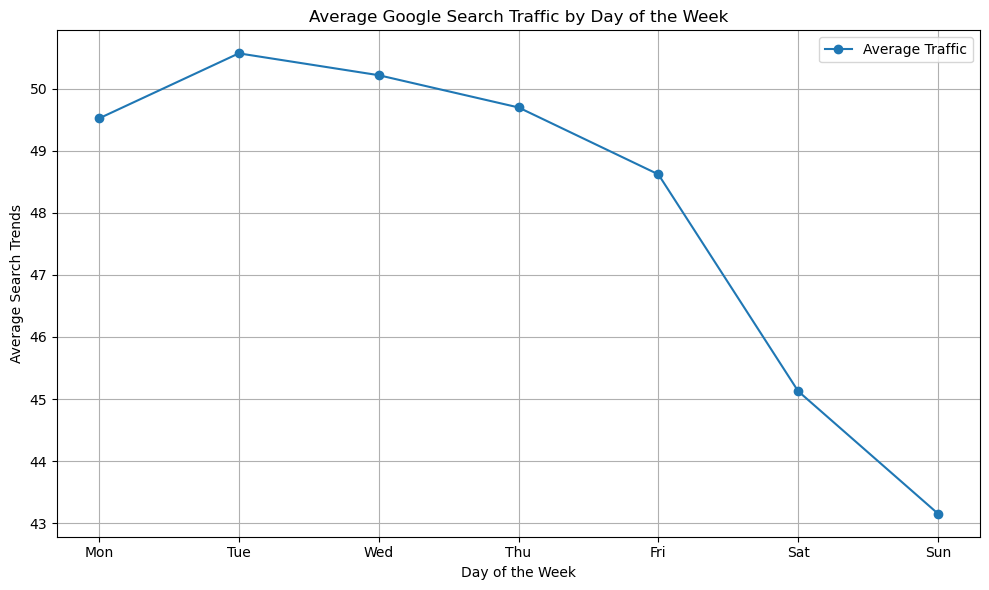

In [9]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`
df['DayOfWeek'] = df.index.dayofweek
average_traffic_by_day = df.groupby('DayOfWeek')['Search Trends'].mean()

# Plot to visualize the average traffic by day of week
plt.figure(figsize=(10, 6))
plt.plot(average_traffic_by_day.index, average_traffic_by_day, marker='o', linestyle='-', label='Average Traffic')
plt.title('Average Google Search Traffic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Search Trends')
plt.legend()
plt.grid(True)
plt.xticks(average_traffic_by_day.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

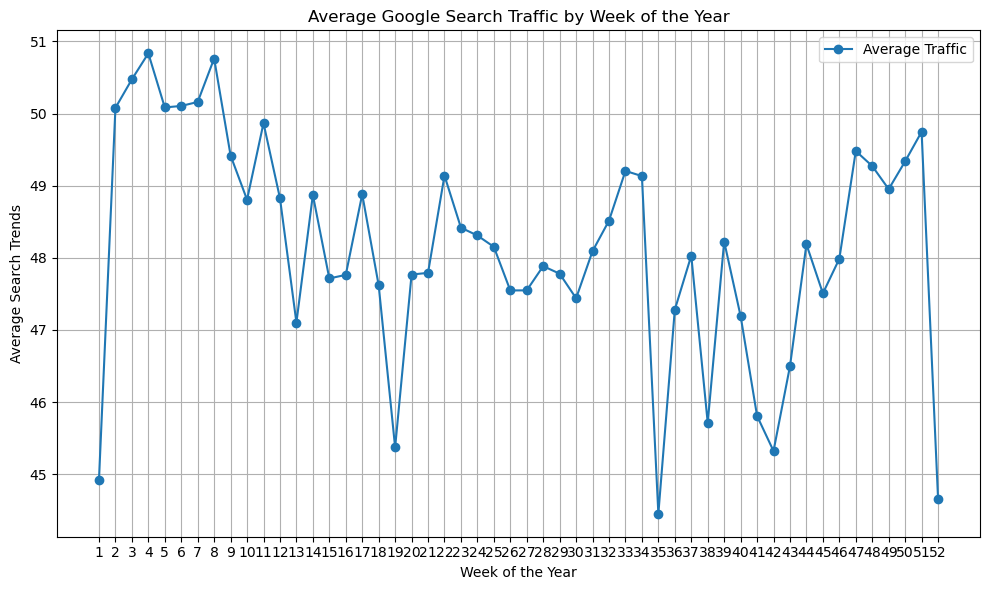

In [10]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`
df['WeekOfYear'] = df.index.isocalendar().week.astype(int)
average_traffic_by_week = df.groupby('WeekOfYear')['Search Trends'].mean()

# Plot to visualize the average traffic by week of the year
plt.figure(figsize=(10, 6))
plt.plot(average_traffic_by_week.index, average_traffic_by_week, marker='o', linestyle='-', label='Average Traffic')
plt.title('Average Google Search Traffic by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Search Trends')
plt.legend()
plt.grid(True)
plt.xticks(average_traffic_by_week.index)
plt.tight_layout()
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** Daily Trends: There are noticeable patterns in search traffic depending on the day of the week. Typically, weekdays tend to have higher search volumes compared to weekends, suggesting that people are more active online during workdays.



## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [11]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


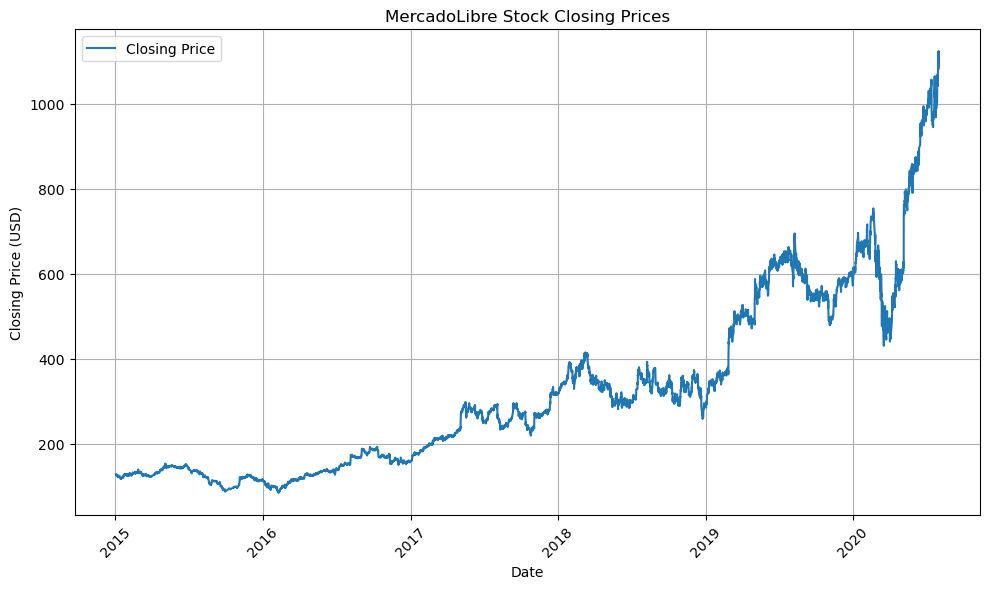

In [12]:
# Visualize the closing price of the df_mercado_stock DataFrame
plt.figure(figsize=(10, 6))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'], label='Closing Price')
plt.title('MercadoLibre Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop any rows with only one column of data
df_combined = pd.concat([df_mercado_stock, df], axis=1)

# Drop rows where both stock and trends data are missing
df_combined = df_combined.dropna(how='all')

# Drop rows where any one of the primary columns ('close' and 'Search Trends') is NaN
df_combined = df_combined.dropna(subset=['close', 'Search Trends'], how='any')
# View the first and last five rows of the DataFrame
display(df_combined.head())
display(df_combined.tail())

,close,Search Trends,HourOfDay,DayOfWeek,WeekOfYear
2016-06-01 09:00:00,135.16,6.0,9.0,2.0,22.0
2016-06-01 10:00:00,136.63,12.0,10.0,2.0,22.0
2016-06-01 11:00:00,136.56,22.0,11.0,2.0,22.0
2016-06-01 12:00:00,136.42,33.0,12.0,2.0,22.0
2016-06-01 13:00:00,136.10,40.0,13.0,2.0,22.0


,close,Search Trends,HourOfDay,DayOfWeek,WeekOfYear
2020-07-31 11:00:00,1105.780,20.0,11.0,4.0,31.0
2020-07-31 12:00:00,1087.925,32.0,12.0,4.0,31.0
2020-07-31 13:00:00,1095.800,41.0,13.0,4.0,31.0
2020-07-31 14:00:00,1110.650,47.0,14.0,4.0,31.0
2020-07-31 15:00:00,1122.510,53.0,15.0,4.0,31.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [14]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = df_combined.loc['2020-01-01':'2020-06-30']

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())

,close,Search Trends,HourOfDay,DayOfWeek,WeekOfYear
2020-01-02 09:00:00,601.085,9.0,9.0,3.0,1.0
2020-01-02 10:00:00,601.290,14.0,10.0,3.0,1.0
2020-01-02 11:00:00,615.410,25.0,11.0,3.0,1.0
2020-01-02 12:00:00,611.400,37.0,12.0,3.0,1.0
2020-01-02 13:00:00,611.830,50.0,13.0,3.0,1.0


,close,Search Trends,HourOfDay,DayOfWeek,WeekOfYear
2020-06-30 11:00:00,976.17,17.0,11.0,1.0,27.0
2020-06-30 12:00:00,977.50,27.0,12.0,1.0,27.0
2020-06-30 13:00:00,973.23,37.0,13.0,1.0,27.0
2020-06-30 14:00:00,976.50,45.0,14.0,1.0,27.0
2020-06-30 15:00:00,984.93,51.0,15.0,1.0,27.0


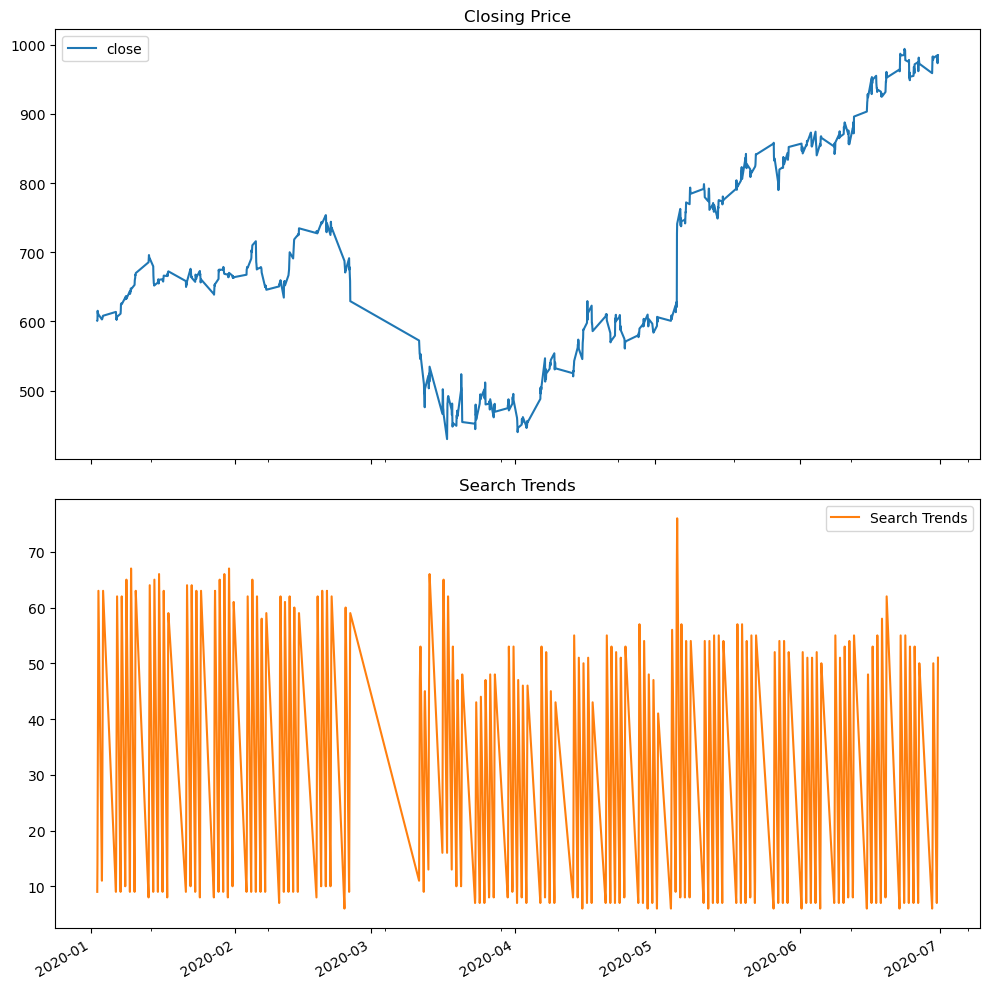

In [15]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
first_half_2020[['close', 'Search Trends']].plot(subplots=True, figsize=(10, 10), title=['Closing Price', 'Search Trends'])
plt.tight_layout()
plt.show()


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Upon analyzing the combined time series data for MercadoLibre's stock closing prices and Google search trends, we observe that both time series demonstrate certain common trends:

Increase in Activity During Financial Announcements: Both the stock prices and search trends tend to spike around the dates when MercadoLibre releases its financial results. This is consistent with the narrative that public interest and investor activity increase around these events.

General Upward Trend: Over the first half of 2020, both the stock prices and search trends generally show an upward trend. This could indicate a growing interest in MercadoLibre as a company, possibly due to increased market presence or favorable financial performance.

Reaction to Market Conditions: Both time series also reflect broader market conditions. For instance, during periods of market uncertainty or economic events, both the stock prices and search trends show corresponding fluctuations.

In [16]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
df_combined['Lagged Search Trends'] = df['Search Trends']
display(df.head())


,Search Trends,HourOfDay,DayOfWeek,WeekOfYear
Date,,,,
2016-06-01 00:00:00,97,0,2,22
2016-06-01 01:00:00,92,1,2,22
2016-06-01 02:00:00,76,2,2,22
2016-06-01 03:00:00,60,3,2,22
2016-06-01 04:00:00,38,4,2,22


In [17]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_combined['Stock Volatility'] = df_combined['close'].pct_change().rolling(window=4).std()

# View the first few rows to check the new column
df_combined.head()


,close,Search Trends,HourOfDay,DayOfWeek,WeekOfYear,Lagged Search Trends,Stock Volatility
2016-06-01 09:00:00,135.16,6.0,9.0,2.0,22.0,6,NaN
2016-06-01 10:00:00,136.63,12.0,10.0,2.0,22.0,12,NaN
2016-06-01 11:00:00,136.56,22.0,11.0,2.0,22.0,22,NaN
2016-06-01 12:00:00,136.42,33.0,12.0,2.0,22.0,33,NaN
2016-06-01 13:00:00,136.10,40.0,13.0,2.0,22.0,40,0.006134


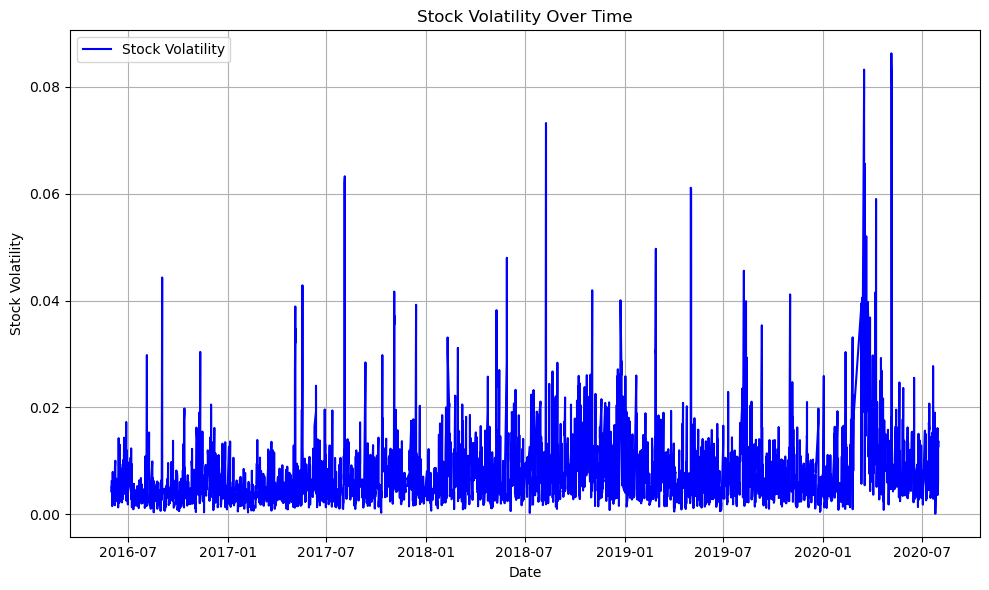

In [18]:
# Visualize the stock volatility
plt.figure(figsize=(10, 6))
plt.plot(df_combined.index, df_combined['Stock Volatility'], label='Stock Volatility', color='blue')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [19]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change() * 100

# View the first few rows to check the new column
display(df_combined.head())



,close,Search Trends,HourOfDay,DayOfWeek,WeekOfYear,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,9.0,2.0,22.0,6,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,10.0,2.0,22.0,12,NaN,1.087600
2016-06-01 11:00:00,136.56,22.0,11.0,2.0,22.0,22,NaN,-0.051233
2016-06-01 12:00:00,136.42,33.0,12.0,2.0,22.0,33,NaN,-0.102519
2016-06-01 13:00:00,136.10,40.0,13.0,2.0,22.0,40,0.006134,-0.234570


In [20]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_combined.head())
display(df_combined.tail())

,close,Search Trends,HourOfDay,DayOfWeek,WeekOfYear,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,9.0,2.0,22.0,6,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,10.0,2.0,22.0,12,NaN,1.087600
2016-06-01 11:00:00,136.56,22.0,11.0,2.0,22.0,22,NaN,-0.051233
2016-06-01 12:00:00,136.42,33.0,12.0,2.0,22.0,33,NaN,-0.102519
2016-06-01 13:00:00,136.10,40.0,13.0,2.0,22.0,40,0.006134,-0.234570


,close,Search Trends,HourOfDay,DayOfWeek,WeekOfYear,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,4.0,31.0,20,0.012837,0.637986
2020-07-31 12:00:00,1087.925,32.0,12.0,4.0,31.0,32,0.013549,-1.614697
2020-07-31 13:00:00,1095.800,41.0,13.0,4.0,31.0,41,0.013295,0.723855
2020-07-31 14:00:00,1110.650,47.0,14.0,4.0,31.0,47,0.013001,1.355174
2020-07-31 15:00:00,1122.510,53.0,15.0,4.0,31.0,53,0.013566,1.067843


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [21]:
print(df_combined.columns)
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

Index(['close', 'Search Trends', 'HourOfDay', 'DayOfWeek', 'WeekOfYear',
       'Lagged Search Trends', 'Stock Volatility', 'Hourly Stock Return'],
      dtype='object')


,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.172826,0.061424
Lagged Search Trends,-0.172826,1.000000,-0.029899
Hourly Stock Return,0.061424,-0.029899,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** There might be some correlation between lagged search traffic and stock volatility. Higher search volumes often indicate increased public interest or concern, which can lead to higher stock volatility as more investors react to the influx of information. However, establishing a consistent, predictable relationship requires a detailed statistical analysis, such as calculating correlation coefficients or running regression analyses. Simple visual inspection or basic correlation might show some association, but deeper analysis is needed for predictive modeling.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [22]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends_reset = df_combined.reset_index()

# Select only the date and search trends columns
df_mercado_trends_reset = df_mercado_trends_reset[['index', 'Search Trends']]

# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_trends_reset.columns = ['ds', 'y']

# Drop any NaN values from the df_mercado_trends_reset DataFrame
df_mercado_trends_reset = df_mercado_trends_reset.dropna()

# View the first and last five rows of the df_mercado_trends_reset DataFrame
display(df_mercado_trends_reset.head())
display(df_mercado_trends_reset.tail())

,ds,y
0,2016-06-01 09:00:00,6.0
1,2016-06-01 10:00:00,12.0
2,2016-06-01 11:00:00,22.0
3,2016-06-01 12:00:00,33.0
4,2016-06-01 13:00:00,40.0


,ds,y
7062,2020-07-31 11:00:00,20.0
7063,2020-07-31 12:00:00,32.0
7064,2020-07-31 13:00:00,41.0
7065,2020-07-31 14:00:00,47.0
7066,2020-07-31 15:00:00,53.0


In [23]:
# Call the Prophet function, store as an object
prophet_model = Prophet()


In [24]:
# Fit the time-series model.
prophet_model.fit(df_mercado_trends_reset)

# View the model object to confirm it's created and fitted
prophet_model

14:49:19 - cmdstanpy - INFO - Chain [1] start processing
14:49:20 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = prophet_model.make_future_dataframe(periods=2000, freq='H')

# Make predictions
forecast_mercado_trends = prophet_model.predict(future_mercado_trends)

# View the last five rows of the future_mercado_trends DataFrame
display(forecast_mercado_trends.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9062,2020-10-22 19:00:00,24.021512,53.144595,62.930103,23.556175,24.479371,33.998770,33.998770,33.998770,31.422923,...,2.528101,2.528101,2.528101,0.047746,0.047746,0.047746,0.0,0.0,0.0,58.020282
9063,2020-10-22 20:00:00,24.020453,54.660592,63.633655,23.554569,24.478430,35.242146,35.242146,35.242146,32.642935,...,2.545112,2.545112,2.545112,0.054099,0.054099,0.054099,0.0,0.0,0.0,59.262599
9064,2020-10-22 21:00:00,24.019394,52.527768,61.946933,23.552963,24.477489,33.171087,33.171087,33.171087,30.546465,...,2.564152,2.564152,2.564152,0.060470,0.060470,0.060470,0.0,0.0,0.0,57.190481
9065,2020-10-22 22:00:00,24.018335,43.684896,53.001057,23.551464,24.476547,24.406892,24.406892,24.406892,21.755576,...,2.584456,2.584456,2.584456,0.066860,0.066860,0.066860,0.0,0.0,0.0,48.425227
9066,2020-10-22 23:00:00,24.017276,27.165499,36.989814,23.550048,24.475606,7.826892,7.826892,7.826892,5.148467,...,2.605157,2.605157,2.605157,0.073268,0.073268,0.073268,0.0,0.0,0.0,31.844168


In [26]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = prophet_model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_mercado_trends.head())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 09:00:00,28.314812,1.684685,11.283116,28.314812,28.314812,-21.740360,-21.740360,-21.740360,-24.339398,...,2.858248,2.858248,2.858248,-0.259210,-0.259210,-0.259210,0.0,0.0,0.0,6.574452
1,2016-06-01 10:00:00,28.314898,8.188861,17.194244,28.314898,28.314898,-15.513889,-15.513889,-15.513889,-18.136582,...,2.880949,2.880949,2.880949,-0.258257,-0.258257,-0.258257,0.0,0.0,0.0,12.801009
2,2016-06-01 11:00:00,28.314984,19.291049,28.762225,28.314984,28.314984,-4.561602,-4.561602,-4.561602,-7.205192,...,2.900917,2.900917,2.900917,-0.257327,-0.257327,-0.257327,0.0,0.0,0.0,23.753382
3,2016-06-01 12:00:00,28.315070,30.365945,39.353875,28.315070,28.315070,6.683989,6.683989,6.683989,4.022684,...,2.917728,2.917728,2.917728,-0.256423,-0.256423,-0.256423,0.0,0.0,0.0,34.999059
4,2016-06-01 13:00:00,28.315156,38.807391,48.369387,28.315156,28.315156,15.304782,15.304782,15.304782,12.629304,...,2.931020,2.931020,2.931020,-0.255543,-0.255543,-0.255543,0.0,0.0,0.0,43.619938


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

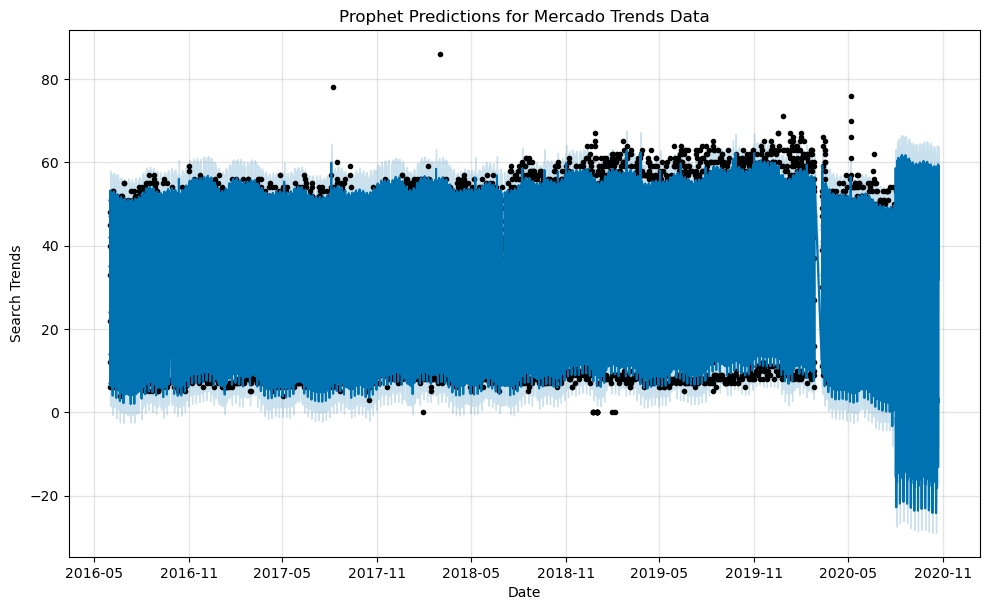

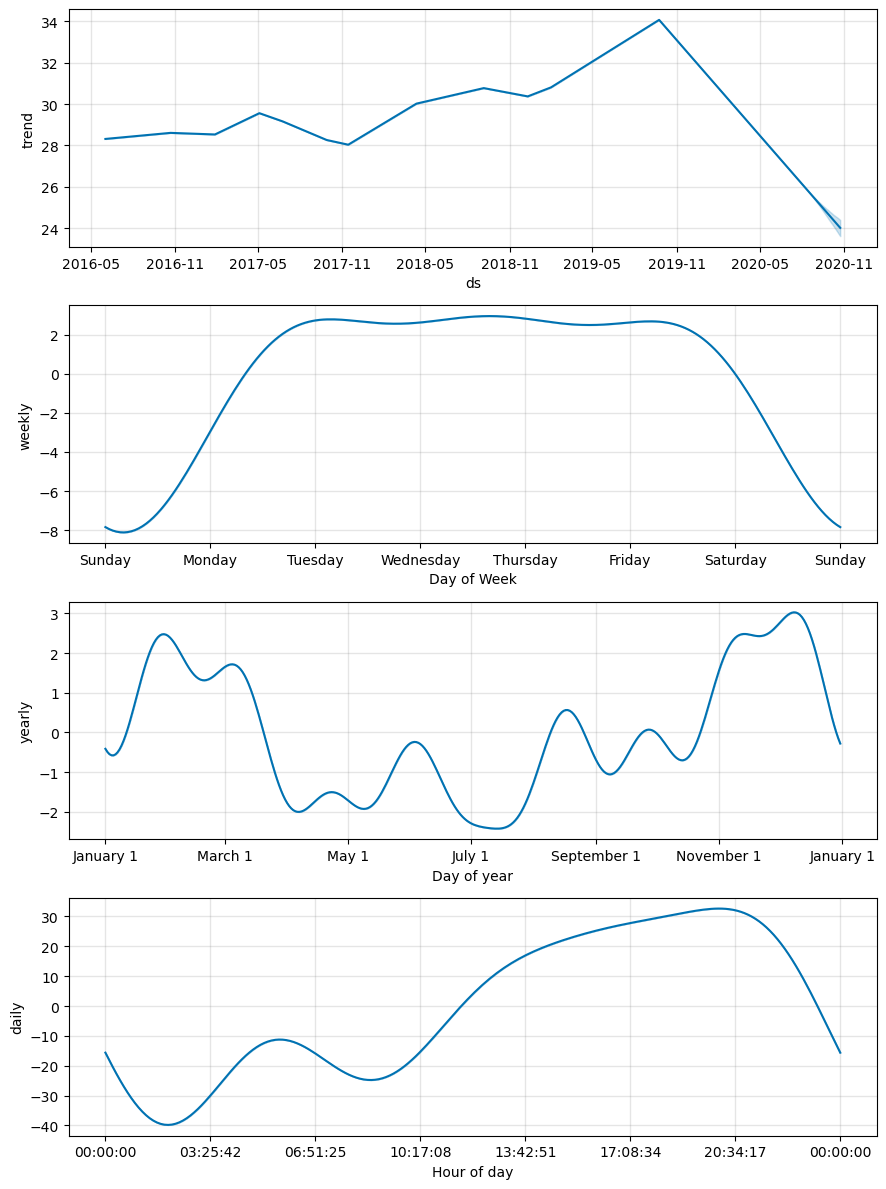

In [27]:
# Suppress the FutureWarning related to DatetimeProperties.to_pydatetime
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plot the Prophet predictions for the Mercado trends data
fig = prophet_model.plot(forecast_mercado_trends)
plt.title('Prophet Predictions for Mercado Trends Data')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.show()

# If you want to include the components plot (trend, weekly, yearly seasonality)
fig2 = prophet_model.plot_components(forecast_mercado_trends)
plt.show()


##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** Increasing Trend: If the forecast shows an upward trend in the search traffic, it suggests growing popularity and interest in MercadoLibre. This could be due to recent business activities, promotions, or news coverage that have captured public attention.

Stable Trend: If the forecast indicates a stable trend with minor fluctuations, it suggests that the interest in MercadoLibre is consistent. This stability can be a sign of sustained interest from its user base without significant spikes or drops.

Decreasing Trend: If the forecast shows a downward trend, it may indicate waning interest in MercadoLibre. This could be due to various factors such as increased competition, lack of new features or services, or negative news affecting the company's image.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [28]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index('ds', inplace=True)

# View only the yhat, yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends_subset = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]

# Display the first few rows of the subset DataFrame
display(forecast_mercado_trends_subset.head())

# Display the last few rows of the subset DataFrame
display(forecast_mercado_trends_subset.tail())



,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 09:00:00,6.574452,1.684685,11.283116
2016-06-01 10:00:00,12.801009,8.188861,17.194244
2016-06-01 11:00:00,23.753382,19.291049,28.762225
2016-06-01 12:00:00,34.999059,30.365945,39.353875
2016-06-01 13:00:00,43.619938,38.807391,48.369387


,yhat,yhat_lower,yhat_upper
ds,,,
2020-10-22 19:00:00,58.020282,53.258616,62.753602
2020-10-22 20:00:00,59.262599,54.771697,63.736112
2020-10-22 21:00:00,57.190481,52.137407,62.053952
2020-10-22 22:00:00,48.425227,43.511669,53.134271
2020-10-22 23:00:00,31.844168,26.771119,36.345123


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

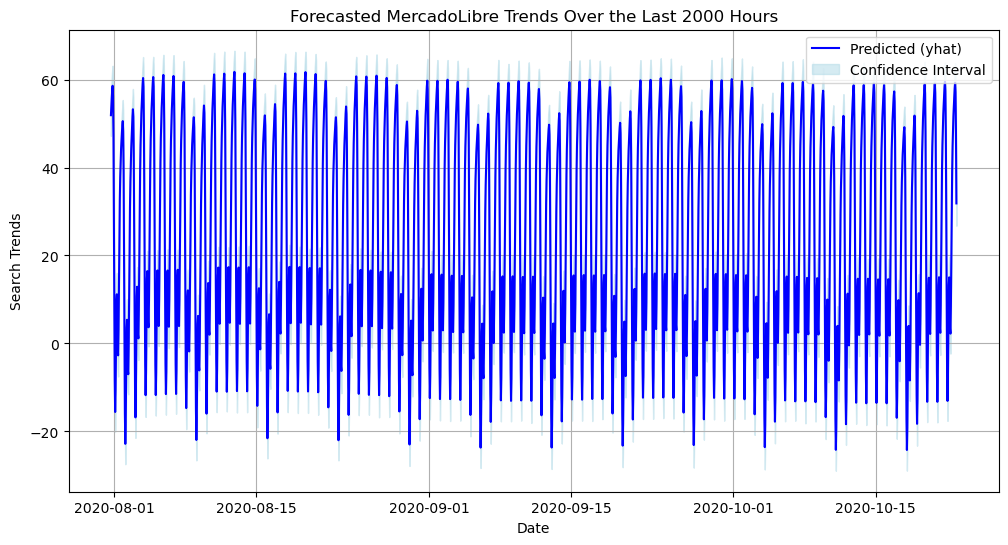

In [29]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forecast_mercado_trends_last_2000 = forecast_mercado_trends_subset.tail(2000)

plt.figure(figsize=(12, 6))
plt.plot(forecast_mercado_trends_last_2000.index, forecast_mercado_trends_last_2000['yhat'], label='Predicted (yhat)', color='blue')
plt.fill_between(forecast_mercado_trends_last_2000.index, 
                 forecast_mercado_trends_last_2000['yhat_lower'], 
                 forecast_mercado_trends_last_2000['yhat_upper'], 
                 color='lightblue', alpha=0.5, label='Confidence Interval')

plt.title('Forecasted MercadoLibre Trends Over the Last 2000 Hours')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.legend()
plt.grid(True)
plt.show()

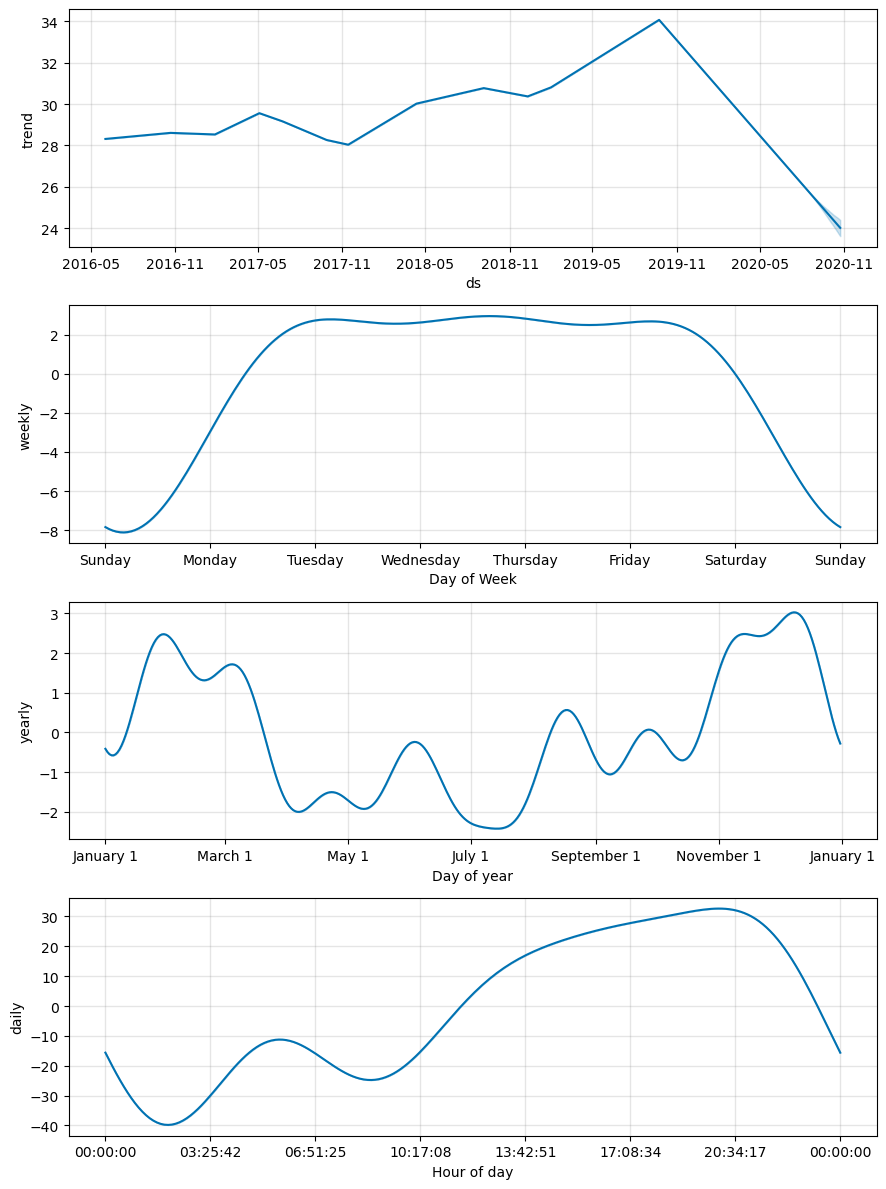

In [30]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends_reset = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_mercado_trends DataFrame
fig2 = prophet_model.plot_components(forecast_mercado_trends_reset)
plt.show()


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** ~ 20:34:17

**Question:** Which day of week gets the most search traffic?
   
**Answer:** Wednesday

###### **Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** April 1
